<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-pandas,-numpy,-matplotlib,-the-Axes3D-module,-and-seaborn" data-toc-modified-id="Load-pandas,-numpy,-matplotlib,-the-Axes3D-module,-and-seaborn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load pandas, numpy, matplotlib, the Axes3D module, and seaborn</a></span></li><li><span><a href="#Run-a-scatter-plot-of-latitude-(latabs)-by-average-temperature" data-toc-modified-id="Run-a-scatter-plot-of-latitude-(latabs)-by-average-temperature-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Run a scatter plot of latitude (latabs) by average temperature</a></span></li><li><span><a href="#Show-the-high-elevation-points-in-red" data-toc-modified-id="Show-the-high-elevation-points-in-red-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Show the high elevation points in red</a></span></li><li><span><a href="#View-a-three-dimensional-plot-of-temperature,-latitude,-and-elevation" data-toc-modified-id="View-a-three-dimensional-plot-of-temperature,-latitude,-and-elevation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>View a three-dimensional plot of temperature, latitude, and elevation</a></span></li><li><span><a href="#Show-a-regression-line-of-latitude-on-the-temperature-data" data-toc-modified-id="Show-a-regression-line-of-latitude-on-the-temperature-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Show a regression line of latitude on the temperature data</a></span></li><li><span><a href="#Show-separate-regression-lines-for-low-and-high-elevation-stations" data-toc-modified-id="Show-separate-regression-lines-for-low-and-high-elevation-stations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Show separate regression lines for low and high elevation stations</a></span></li><li><span><a href="#Show-some-stations-above-the-low-and-high-elevation-regression-lines" data-toc-modified-id="Show-some-stations-above-the-low-and-high-elevation-regression-lines-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Show some stations above the low and high elevation regression lines</a></span></li><li><span><a href="#Show-some-stations-below-the-low-and-high-elevation-regression-lines" data-toc-modified-id="Show-some-stations-below-the-low-and-high-elevation-regression-lines-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Show some stations below the low and high elevation regression lines</a></span></li></ul></div>

# Load pandas, numpy, matplotlib, the Axes3D module, and seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# pd.set_option('display.width', 80)
# pd.set_option('display.max_columns', 12)
# pd.set_option('display.max_rows', 200)
# pd.options.display.float_format = '{:,.0f}'.format

In [3]:
import watermark
%load_ext watermark

%watermark -n -i -iv

matplotlib: 3.3.2
json      : 2.0.9
seaborn   : 0.11.1
numpy     : 1.19.2
watermark : 2.1.0
pandas    : 1.2.1



In [4]:
landtemps = pd.read_csv('data/landtemps2019avgs.csv')

# Run a scatter plot of latitude (latabs) by average temperature

In [5]:
landtemps.tail(2)

,locationid,station,countryid,country,latabs,elevation,avgtemp
12093,ZA000067743,LIVINGSTONE,ZA,Zambia,17.817,986.0,24.416667
12094,ZI000067775,HARARE_KUTSAGA,ZI,Zimbabwe,17.917,1480.0,19.495000


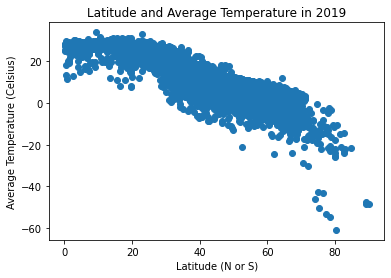

In [6]:
plt.scatter(x='latabs', y='avgtemp', data=landtemps)
plt.xlabel('Latitude (N or S)')
plt.ylabel('Average Temperature (Celsius)')
plt.yticks(np.arange(-60, 40, step=20))
plt.title('Latitude and Average Temperature in 2019')
plt.show()

# Show the high elevation points in red

In [7]:
low, high = landtemps.loc[landtemps['elevation'] <= 1000], landtemps.loc[
    landtemps['elevation'] > 1000]

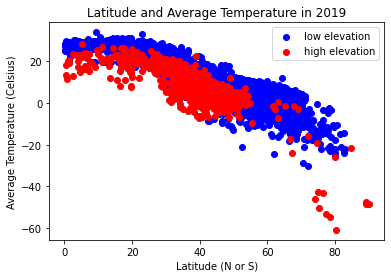

In [8]:
plt.scatter(x='latabs', y='avgtemp', c='blue', data=low)
plt.scatter(x='latabs', y='avgtemp', c='red', data=high)
plt.legend(('low elevation', 'high elevation'))
plt.xlabel('Latitude (N or S)')
plt.ylabel('Average Temperature (Celsius)')
plt.title('Latitude and Average Temperature in 2019')
plt.show()

# View a three-dimensional plot of temperature, latitude, and elevation

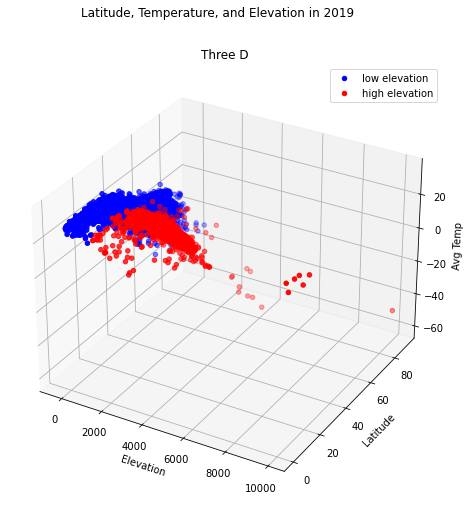

In [12]:
# fig, ax = plt.subplots(figsize=(8,8))
fig = plt.figure(figsize=(8, 8))
plt.suptitle('Latitude, Temperature, and Elevation in 2019')
ax = plt.axes(projection='3d')
ax.set_title('Three D')
ax.set_xlabel('Elevation')
ax.set_ylabel('Latitude')
ax.set_zlabel('Avg Temp')
ax.scatter3D(low['elevation'],
             low['latabs'],
             low['avgtemp'],
             label='low elevation',
             c='blue')
ax.scatter3D(high['elevation'],
             high['latabs'],
             high['avgtemp'],
             label='high elevation',
             c='red')
ax.legend()
plt.show()

# Show a regression line of latitude on the temperature data

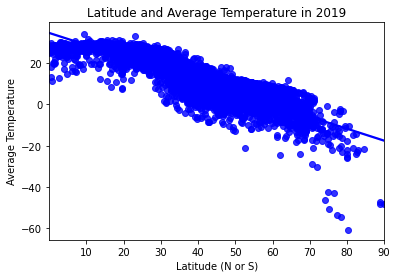

In [13]:
sns.regplot(x='latabs', y='avgtemp', color='blue', data=landtemps)
plt.title('Latitude and Average Temperature in 2019')
plt.xlabel('Latitude (N or S)')
plt.ylabel('Average Temperature')
plt.show()

# Show separate regression lines for low and high elevation stations

In [15]:
landtemps['elevation_group'] = np.where(landtemps['elevation'] <= 1000, 'low',
                                        'high')

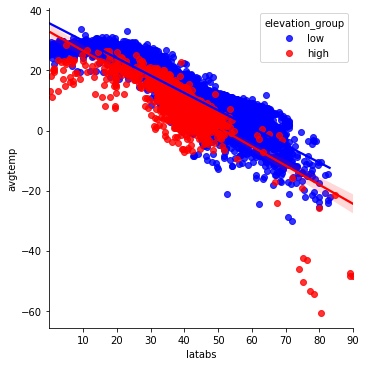

In [16]:
sns.lmplot(x='latabs',
           y='avgtemp',
           hue='elevation_group',
           palette=dict(low='blue', high='red'),
           legend_out=False,
           data=landtemps)

# Show some stations above the low and high elevation regression lines

In [17]:
high.loc[(high['latabs'] > 38) & (high['avgtemp'] >= 18),
         ['station', 'country', 'latabs', 'elevation', 'avgtemp']]

,station,country,latabs,elevation,avgtemp
3943,LAJES_AB,Portugal,38.7303,1016.2,18.041667
5805,WILD_HORSE_6N,United States,38.9031,1438.7,22.770000


In [18]:
low.loc[(low['latabs'] > 47) & (low['avgtemp'] >= 14),
        ['station', 'country', 'latabs', 'elevation', 'avgtemp']]

,station,country,latabs,elevation,avgtemp
1048,SAANICHTON_CDA,Canada,48.6167,61.0,17.820000
1146,CLOVERDALE_EAST,Canada,49.1167,50.0,14.751667
6830,WINNIBIGOSHISH_DAM,United States,47.4306,400.8,18.370000
7125,WINIFRED,United States,47.5589,988.5,16.310000


# Show some stations below the low and high elevation regression lines

In [19]:
high.loc[(high['latabs'] < 5) & (high['avgtemp'] < 18),
         ['station', 'country', 'latabs', 'elevation', 'avgtemp']]

,station,country,latabs,elevation,avgtemp
2250,BOGOTA_ELDORADO,Colombia,4.701,2548.0,14.766667
2272,SAN_LUIS,Colombia,0.862,2976.4,11.320833
2303,IZOBAMBA,Ecuador,0.350,3058.0,13.220000
2306,CANAR,Ecuador,2.550,3083.0,13.036364
2307,LOJA_LA_ARGELIA,Ecuador,4.033,2160.0,17.140909


In [20]:
low.loc[(low['latabs'] < 50) & (low['avgtemp'] < -9),
        ['station', 'country', 'latabs', 'elevation', 'avgtemp']]

,station,country,latabs,elevation,avgtemp
1189,FT_STEELE_DANDY_CRK,Canada,49.5167,856.0,-12.190000
1547,BALDUR,Canada,49.2833,450.0,-10.856000
1833,POINTE_CLAVEAU,Canada,48.2667,4.0,-10.620000
1862,CHUTE_DES_PASSES,Canada,49.8333,398.0,-12.802500
6544,PRESQUE_ISLE,United States,46.6539,182.6,-9.696667
